In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib
import matplotlib.pyplot as plt

import os
import pandas as pd

In [3]:
%cd /content/drive/My Drive/2017_food_posoning_regression/

/content/drive/My Drive/2017_food_posoning_regression


In [4]:
label_list = ['병원성 대장균', '살모넬라', '노로바이러스', '캠필로박터제주니', '클로스트리디움퍼프린젠스']
dir_list = ['./2017_food_posoning.csv', './2017_weather_data.csv']

In [5]:
food_df = pd.read_csv(dir_list[0])
weather_df = pd.read_csv(dir_list[1])

In [6]:
food_df.drop(['date'], axis = 1, inplace = True)
weather_df.drop(['date'], axis = 1, inplace = True)

In [7]:
food_df.tail()

,pathogenic E. coli,salmonella,norovirus,campylobacter jejuni,clostridium_perfringens
7,1033,110,178,0,13
8,284,129,89,0,0
9,89,146,22,0,0
10,0,31,15,0,0
11,0,0,86,0,0


In [8]:
weather_df.tail()

,temperature,precipitation,wind_speed,humidity,water_vapor_pressure,dew_point,atmospheric_pressure,sunshine
7,25.9,297.0,2.3,71,23.7,19.7,997.7,166.2
8,22.1,35.0,2.0,61,16.0,13.6,1003.1,233.7
9,16.4,26.5,1.9,56,10.7,7.0,1010.7,222.7
10,5.6,40.7,2.1,54,5.4,-3.9,1012.4,163.9
11,-1.9,34.8,1.8,56,3.3,-10.3,1015.1,176.1


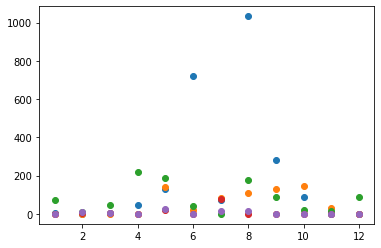

In [9]:
month_list = range(1,13);

for item in food_df:
  if item == 'date': continue
  plt.scatter(month_list, food_df[item])

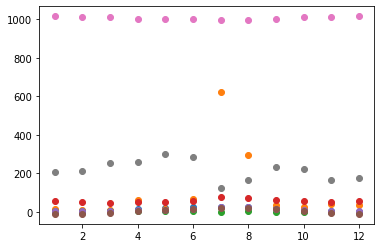

In [10]:
for item in weather_df:
  if item == 'date': continue
  plt.scatter(month_list, weather_df[item])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
weather_df = pd.DataFrame(scaler.fit(weather_df).transform(weather_df))
food_df = pd.DataFrame(scaler.fit(food_df).transform(food_df))

In [12]:
weather_df.tail()

,0,1,2,3,4,5,6,7
7,0.965278,0.471538,0.625,0.793103,0.864979,0.923077,0.011364,0.241592
8,0.833333,0.044202,0.250,0.448276,0.540084,0.735385,0.318182,0.619955
9,0.635417,0.030338,0.125,0.275862,0.316456,0.532308,0.750000,0.558296
10,0.260417,0.053499,0.375,0.206897,0.092827,0.196923,0.846591,0.228700
11,0.000000,0.043875,0.000,0.275862,0.004219,0.000000,1.000000,0.297085


In [13]:
food_df.tail()

,0,1,2,3,4
7,1.000000,0.753425,0.820276,0.0,0.481481
8,0.274927,0.883562,0.410138,0.0,0.000000
9,0.086157,1.000000,0.101382,0.0,0.000000
10,0.000000,0.212329,0.069124,0.0,0.000000
11,0.000000,0.000000,0.396313,0.0,0.000000


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(weather_df, food_df, test_size = 0.3, shuffle = True)

In [111]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

epoch = 1000
batch = 64

model = Sequential()
model.add(Dense(64, input_shape = [8,], activation="relu"))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 30)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', verbose = 1, save_best_only = True)

# optimizer = adam or rmsprop loss = mse
model.compile(optimizer = 'adam', loss ='mse', metrics = ['acc'])
model.fit(x_train, y_train, callbacks = [es, mc], epochs = epoch, batch_size=batch, verbose = 1, validation_split = 0.3)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 0.0898 - acc: 0.0000e+00
Epoch 1: val_acc improved from -inf to 0.00000, saving model to best_model.h5
1/1 [==============================] - 2s 2s/step - loss: 0.0898 - acc: 0.0000e+00 - val_loss: 0.1244 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.0891 - acc: 0.2000
Epoch 2: val_acc improved from 0.00000 to 0.33333, saving model to best_model.h5
1/1 [==============================] - 0s 296ms/step - loss: 0.0891 - acc: 0.2000 - val_loss: 0.1242 - val_acc: 0.3333
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.0888 - acc: 0.2000
Epoch 3: val_acc did not improve from 0.33333
1/1 [==============================] - 0s 126ms/step - loss: 0.0888 - acc: 0.2000 - val_loss: 0.1240 - val_acc: 0.3333
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 0.0884 - acc: 0.6000
Epoch 4: val_acc did not improve from 0.33333
1/1 [======================

In [112]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % loaded_model.evaluate(x_valid, y_valid)[1])

1/1 [==============================] - 0s 183ms/step - loss: 0.1600 - acc: 0.5000

 테스트 정확도: 0.5000


In [120]:
print(loaded_model.predict(x_train[7:8]))

[[0.19407421 0.19945674 0.2036895  0.20129257 0.20148697]]


In [124]:
y_train

,0,1,2,3,4
5,0.696031,0.157534,0.188940,0.000000,0.000000
7,1.000000,0.753425,0.820276,0.000000,0.481481
11,0.000000,0.000000,0.396313,0.000000,0.000000
10,0.000000,0.212329,0.069124,0.000000,0.000000
2,0.002904,0.000000,0.221198,0.038961,0.185185
1,0.000000,0.000000,0.041475,0.038961,0.370370
6,0.071636,0.568493,0.000000,1.000000,0.518519
3,0.044530,0.000000,1.000000,0.000000,0.000000


,0,1,2,3,4
0,0.005808,0.0,0.345622,0.0,0.0
